In [1]:
from syft import Worker
import syft as sy
worker = Worker.named("test-domain-1", processes=1, reset=False)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/pysyft


SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

# Download mock and submit project

## Get mock

In [2]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [3]:
ds = guest_domain_client.datasets[0]

In [4]:
asset = ds.assets["bikes"]

In [5]:
df = asset.mock

## Selecting a column

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [6]:
df['Berri 1']

2005-06-01    150
2005-06-02    127
2005-06-03    113
2005-06-04    151
2005-06-05    169
             ... 
2006-04-02    170
2006-04-03    154
2006-04-04    154
2006-04-05    134
2006-04-06    119
Name: Berri 1, Length: 310, dtype: int64

## Plotting a column

Just add .plot() to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March,

<AxesSubplot: >

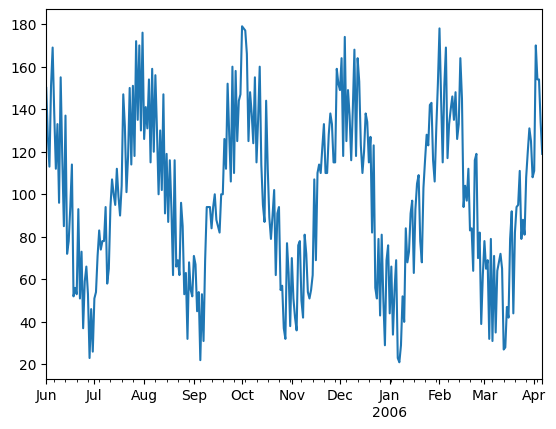

In [7]:
df['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too. You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

<AxesSubplot: >

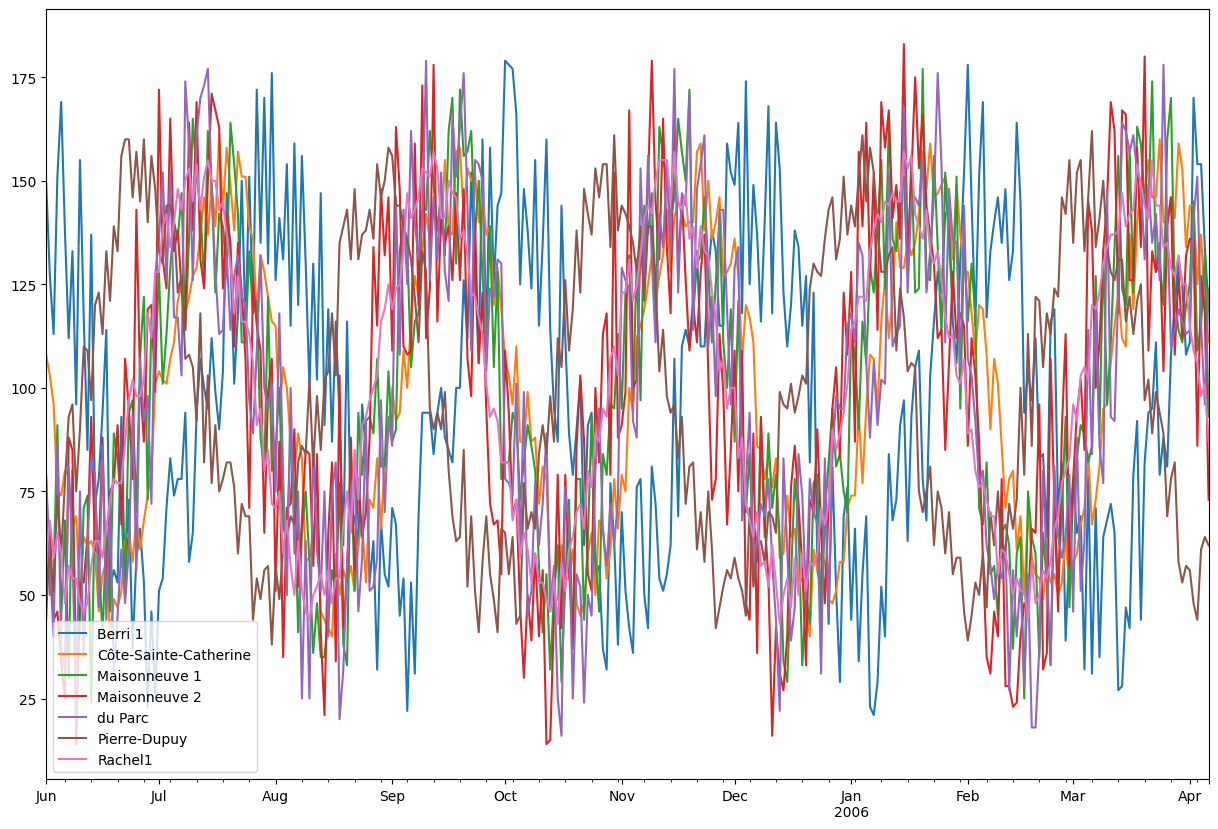

In [8]:
df.plot(figsize=(15, 10))

## Putting that all together

Here's the code we needed to write do draw that graph, all together:



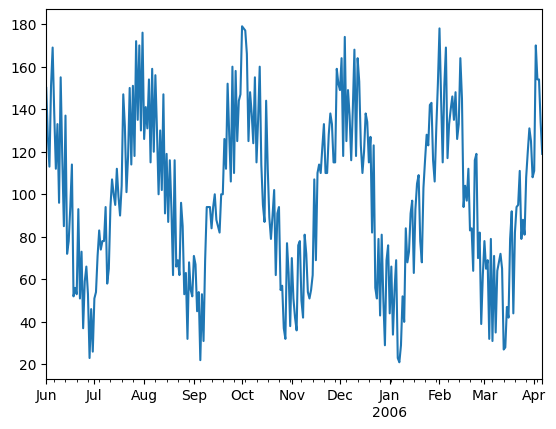

In [9]:
res = df['Berri 1'].plot()

In [10]:
@sy.syft_function(input_policy=sy.ExactMatch(df=asset.mock),
                  output_policy=sy.SingleExecutionExactOutput())
def get_column(df):
    return df['Berri 1']

Request code execution

In [11]:
req = guest_domain_client.api.services.code.request_code_execution(get_column)


In [12]:
submitted_code = guest_domain_client.code[0]

In [13]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [14]:
new_project = sy.Project(name="My pandas project 2",
                         description="Hi, I would like to plot the Berri 1 column.")

In [15]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [16]:
guest_domain_client.submit_project(new_project)

<class 'syft.core.node.new.response.SyftSuccess'>: Project Submitted